In [1]:
#import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import math
from pandas_datareader import data
from statsmodels.tsa import stattools
from statsmodels.tsa import arima_model
from statsmodels.graphics import gofplots
from statsmodels.regression import linear_model
from scipy import stats

# Time series of adjusted prices

In [2]:
#define a list otickers by hand and download their prices and volumes from Yahoo!
tickers = ['INTC']
start_date = '2016-01-01'
end_date = '2020-01-01'
stock_data = data.get_data_yahoo(tickers, start_date, end_date)

In [3]:
#see how the resulting Data Frame looks
stock_data.head(7)

Attributes,High,Low,Open,Close,Volume,Adj Close
Symbols,INTC,INTC,INTC,INTC,INTC,INTC
Date,,,,,,
2016-01-04,34.009998,33.459999,33.880001,33.990002,27882200.0,30.304258
2016-01-05,34.000000,33.529999,33.959999,33.830002,16709500.0,30.161600
2016-01-06,33.520000,32.799999,33.250000,33.080002,25491300.0,29.492939
2016-01-07,33.009998,31.840000,32.279999,31.840000,37680500.0,28.387400
2016-01-08,32.220001,31.430000,32.090000,31.510000,29953800.0,28.093178
2016-01-11,32.220001,31.680000,31.809999,32.060001,27732400.0,28.583538
2016-01-12,32.889999,32.270000,32.759998,32.680000,28587700.0,29.136305


In [4]:
price = list(stock_data['Adj Close']['INTC'])

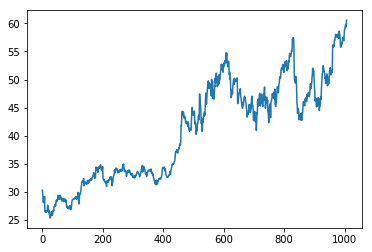

In [5]:
plt.plot(price)

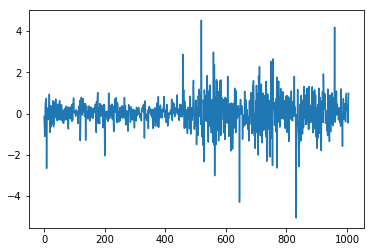

In [6]:
a_ret = np.diff(price)
plt.plot(a_ret)

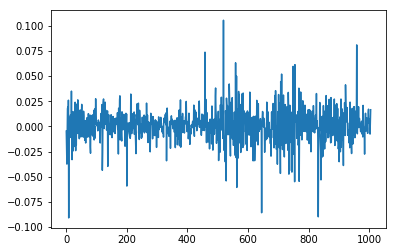

In [7]:
r_ret = np.divide(np.diff(price),price[0:(len(price)-1)])
plt.plot(r_ret)

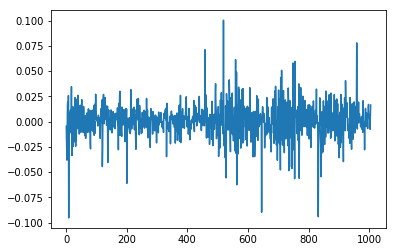

In [8]:
l_ret = np.diff([math.log(p) for p in price])
plt.plot(l_ret)

# Simulated iid normals

In [9]:
sigma = np.std(l_ret)
print(sigma)

0.016319030666068938


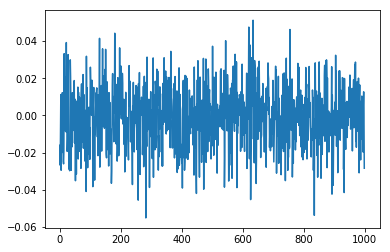

In [10]:
iid = np.random.normal(0,sigma,1000)
plt.plot(iid)

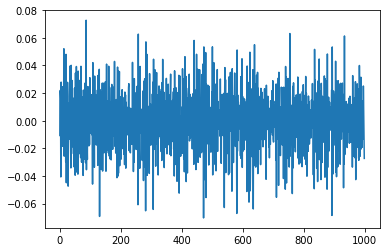

In [11]:
plt.plot(np.diff(iid))

# Random walk

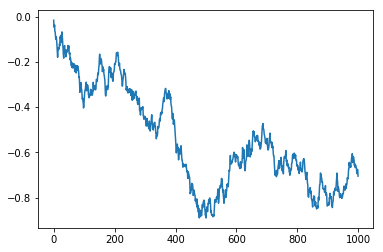

In [12]:
rw = np.cumsum(iid)
plt.plot(rw)

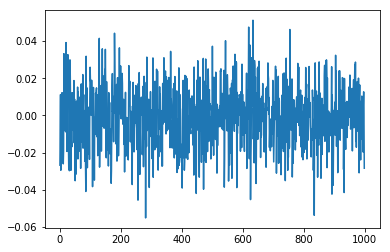

In [13]:
plt.plot(np.diff(rw))

# Distribution of residuals

(array([ 8., 19., 20., 12., 41., 21.,  7.,  3., 29., 56., 61., 77., 65.,
        17.,  4.,  0.,  8.,  6.,  4.,  1.,  0.,  3., 12., 12., 24., 25.,
        38., 18., 42., 42., 42., 35., 17., 26., 28., 31., 25., 23., 23.,
        14.,  4.,  8.,  3., 12.,  6., 16.,  9.,  5.,  4.,  1.]),
 array([25.38138199, 26.08459137, 26.78780075, 27.49101013, 28.19421951,
        28.89742889, 29.60063828, 30.30384766, 31.00705704, 31.71026642,
        32.4134758 , 33.11668518, 33.81989456, 34.52310394, 35.22631332,
        35.92952271, 36.63273209, 37.33594147, 38.03915085, 38.74236023,
        39.44556961, 40.14877899, 40.85198837, 41.55519775, 42.25840714,
        42.96161652, 43.6648259 , 44.36803528, 45.07124466, 45.77445404,
        46.47766342, 47.1808728 , 47.88408218, 48.58729156, 49.29050095,
        49.99371033, 50.69691971, 51.40012909, 52.10333847, 52.80654785,
        53.50975723, 54.21296661, 54.91617599, 55.61938538, 56.32259476,
        57.02580414, 57.72901352, 58.4322229 , 59.13543228,

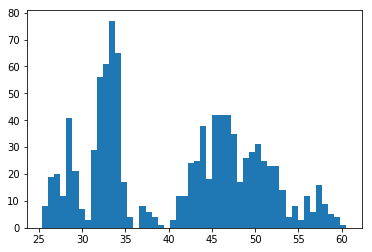

In [14]:
plt.hist(price,50)

(array([  0.,   0.,   1.,   1.,   2.,   2.,   0.,   2.,   2.,   1.,   2.,
          2.,   7.,   5.,   5.,  14.,  16.,  16.,  23.,  23.,  35.,  50.,
         74.,  77.,  95., 103., 105.,  75.,  57.,  53.,  51.,  17.,  22.,
         17.,  12.,  11.,   9.,   3.,   2.,   2.,   1.,   0.,   1.,   1.,
          0.,   1.,   2.,   0.,   0.,   0.]),
 array([-0.07  , -0.0672, -0.0644, -0.0616, -0.0588, -0.056 , -0.0532,
        -0.0504, -0.0476, -0.0448, -0.042 , -0.0392, -0.0364, -0.0336,
        -0.0308, -0.028 , -0.0252, -0.0224, -0.0196, -0.0168, -0.014 ,
        -0.0112, -0.0084, -0.0056, -0.0028,  0.    ,  0.0028,  0.0056,
         0.0084,  0.0112,  0.014 ,  0.0168,  0.0196,  0.0224,  0.0252,
         0.028 ,  0.0308,  0.0336,  0.0364,  0.0392,  0.042 ,  0.0448,
         0.0476,  0.0504,  0.0532,  0.056 ,  0.0588,  0.0616,  0.0644,
         0.0672,  0.07  ]),
 <a list of 50 Patch objects>)

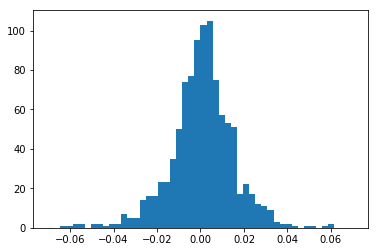

In [15]:
plt.hist(l_ret,50,(-0.07,0.07))

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  3.,  9.,  6.,
        12., 19., 18., 28., 34., 42., 35., 44., 52., 66., 61., 70., 71.,
        63., 59., 77., 43., 40., 34., 30., 21., 19., 16.,  9.,  4.,  3.,
         2.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.07  , -0.0672, -0.0644, -0.0616, -0.0588, -0.056 , -0.0532,
        -0.0504, -0.0476, -0.0448, -0.042 , -0.0392, -0.0364, -0.0336,
        -0.0308, -0.028 , -0.0252, -0.0224, -0.0196, -0.0168, -0.014 ,
        -0.0112, -0.0084, -0.0056, -0.0028,  0.    ,  0.0028,  0.0056,
         0.0084,  0.0112,  0.014 ,  0.0168,  0.0196,  0.0224,  0.0252,
         0.028 ,  0.0308,  0.0336,  0.0364,  0.0392,  0.042 ,  0.0448,
         0.0476,  0.0504,  0.0532,  0.056 ,  0.0588,  0.0616,  0.0644,
         0.0672,  0.07  ]),
 <a list of 50 Patch objects>)

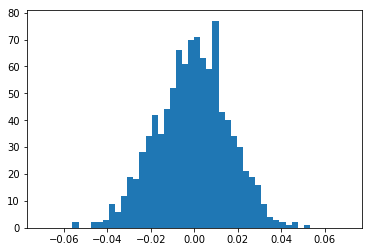

In [16]:
plt.hist(iid,50,(-0.07,0.07))

# Auto-covariance function

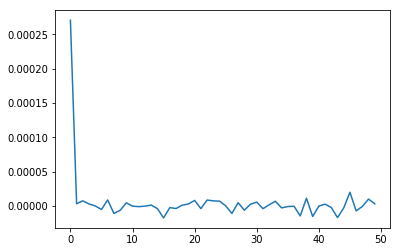

In [17]:
my_acf = stattools.acovf(iid)
plt.plot(my_acf[0:50])

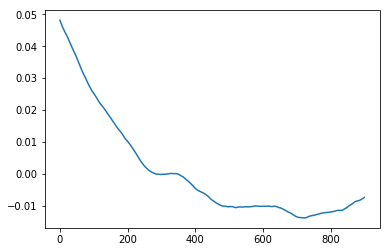

In [18]:
my_acf = stattools.acovf(rw)
plt.plot(my_acf[0:900])

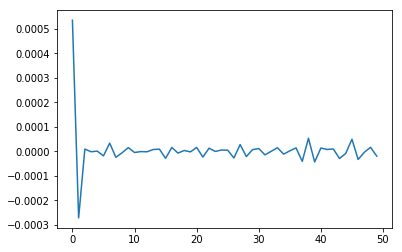

In [19]:
my_acf = stattools.acovf(np.diff(iid))
plt.plot(my_acf[0:50])

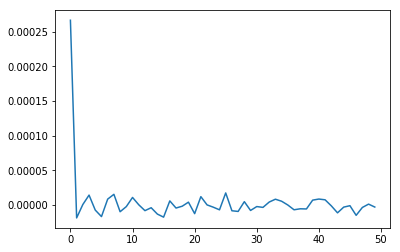

In [20]:
my_acf = stattools.acovf(l_ret)
plt.plot(my_acf[0:50])

# QQ plot

In [21]:
iid_norm = iid/np.std(iid)
l_ret_norm = (l_ret - np.mean(l_ret))/np.std(l_ret)

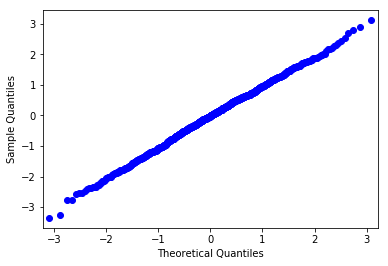

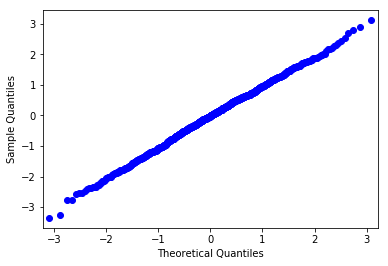

In [22]:
gofplots.qqplot(iid_norm)

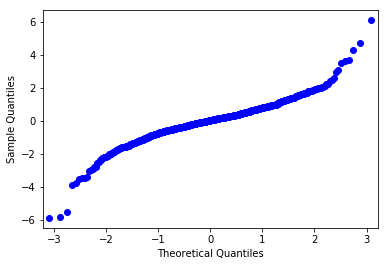

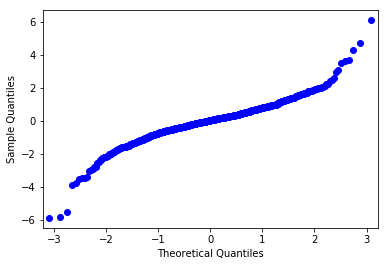

In [23]:
gofplots.qqplot(l_ret_norm)

# AR models

In [24]:
rho = 0.95
my_AR1 = [iid[0]]
for i in range(len(iid)-1):
    my_AR1.append(my_AR1[i]*rho + iid[i+1])

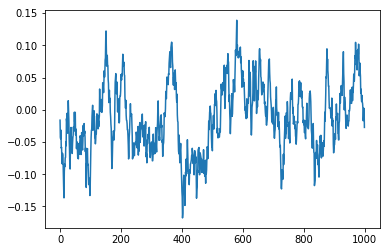

In [25]:
plt.plot(my_AR1)

In [26]:
phi, sigma = linear_model.yule_walker(my_AR1,order=1)
print(phi)

[0.9518533]


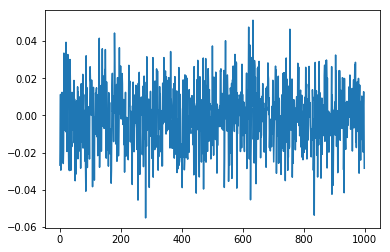

In [27]:
rho = phi[0]
res=[]
for i in range(len(my_AR1)-1):
    res.append(my_AR1[i+1]-my_AR1[i]*rho)
plt.plot(res)

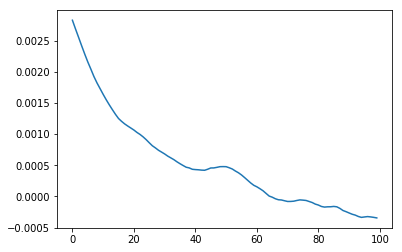

In [28]:
my_acf = stattools.acovf(my_AR1)
plt.plot(my_acf[0:100])

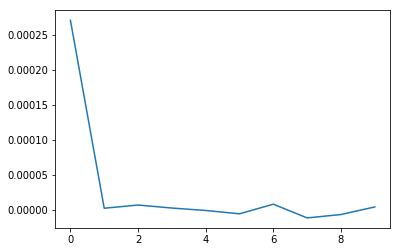

In [29]:
my_acf = stattools.acovf(res)
plt.plot(my_acf[0:10])

# MA models

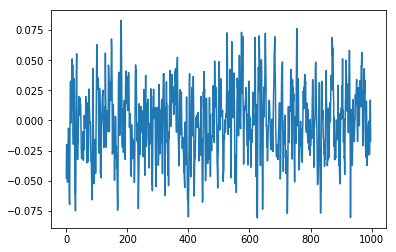

In [30]:
my_MA2=[]
for i in range(len(iid)-2):
    my_MA2.append(iid[i]+iid[i+1]+iid[i+2])
plt.plot(my_MA2)

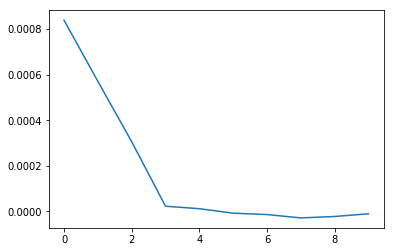

In [31]:
my_acf = stattools.acovf(my_MA2)
plt.plot(my_acf[0:10])

In [32]:
my_arima = arima_model.ARMA(my_MA2,[2,3])
arma_results = my_arima.fit()
print(arma_results.arparams)
print(arma_results.maparams)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


[0.34766251 0.01511702]
[ 0.66499916  0.67497491 -0.32660757]


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Dickey-Fuller test

In [33]:
my_DF = stattools.adfuller(my_AR1,0,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-5.004119733925192
2.1780254379013813e-05
0


In [34]:
my_DF = stattools.adfuller(my_MA2)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-5.732346351414278
6.556087375627623e-07
21


In [35]:
my_DF = stattools.adfuller(rw)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-2.281507805217887
0.17800144768448228
0


In [36]:
my_DF = stattools.adfuller(price)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-0.5179155404132756
0.88847272898371
5


In [37]:
my_DF = stattools.adfuller(l_ret,1)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-33.94733811638464
0.0
0


# Checking for cointegration

In [38]:
tickers = ['SMH']
start_date = '2016-01-01'
end_date = '2020-01-01'
stock_data = data.get_data_yahoo(tickers, start_date, end_date)
price2 = list(stock_data['Adj Close']['SMH'])

<function matplotlib.pyplot.show>

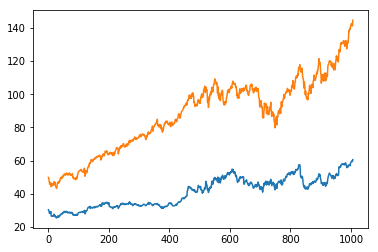

In [39]:
plt.plot(price)
plt.plot(price2)
plt.show

In [40]:
my_arima = arima_model.ARMA(price,[1,0],price2)
arma_results = my_arima.fit()
print(arma_results.arparams)
print(arma_results.maparams)
print(arma_results.params)#trend, exogenous coeff., AR coeff., MA coeff.

[0.98872004]
[]
[7.42757021 0.38279579 0.98872004]


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


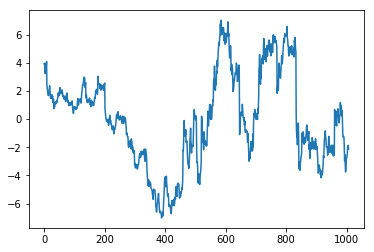

In [41]:
c = arma_results.params[1]

Z = np.array(price)-np.array(price2)*c
Z = Z-np.mean(Z)
plt.plot(Z)

-0.006262577699233333
0.3852709762784194
1.1986133431684306e-165


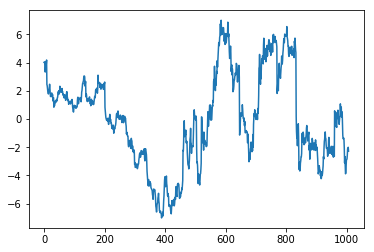

In [42]:
#compare to OLS on price increments
x = np.diff(price2)
y = np.diff(price)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(intercept)
print(slope)
print(p_value)
Z1 = np.array(price)-np.array(price2)*slope
Z1 = Z1-np.mean(Z1)
plt.plot(Z1)

In [43]:
#run Dickey-Fuller test
my_DF = stattools.adfuller(Z,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-2.469728998685015
0.12301436309916108
1


In [44]:
phi, sigma = linear_model.yule_walker(Z,order=1)
print(phi)

[0.98884823]


<function matplotlib.pyplot.show>

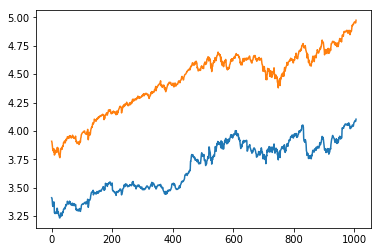

In [45]:
#cointegration for log-prices
logprice = np.log(price)
logprice2 = np.log(price2)
plt.plot(logprice)
plt.plot(logprice2)
plt.show

In [46]:
my_arima = arima_model.ARMA(logprice,[1,0],logprice2)
arma_results = my_arima.fit()
print(arma_results.arparams)
print(arma_results.maparams)
print(arma_results.params)#trend, exogenous coeff., AR coeff., MA coeff.

[0.99198341]
[]
[0.1030211  0.8104256  0.99198341]


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


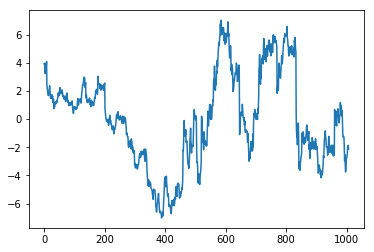

In [47]:
c2 = arma_results.params[1]
Z2 = np.array(logprice)-np.array(logprice2)*c2
Z2 = Z2-np.mean(Z2)
plt.plot(Z)

In [48]:
#run Dickey-Fuller test
my_DF = stattools.adfuller(Z2,1,'c',None)
print(my_DF[0])#test statistic value
print(my_DF[1])#pvalue
print(my_DF[2])#order of AR tested

-2.531972639569755
0.10788754969095499
1
